In [113]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [114]:
filename = "/data/xenon/acolijn/G4FastSim/fast/fastsim_max100keV.root"
#filename = "/data/xenon/acolijn/G4FastSim/fast/fastsim_all.root"

#filename = "/data/xenon/acolijn/G4FastSim/standard/standard.root"

file = uproot.open(filename)
ev = file["ev"].arrays()

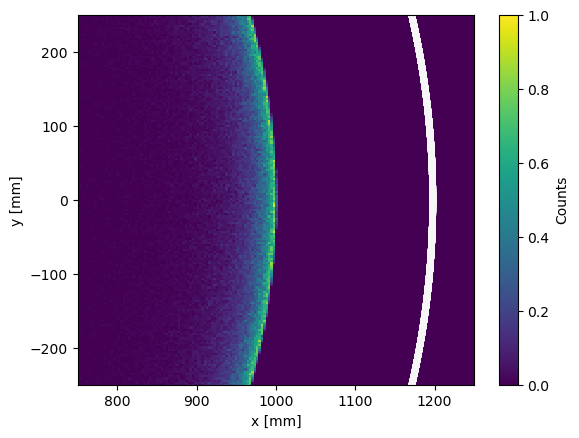

In [120]:

cut = (abs(ev['zp']) < 1000.0)
xh =ak.to_numpy(ak.flatten(ev['xh'][cut]))
yh =ak.to_numpy(ak.flatten(ev['yh'][cut]))
eh =ak.to_numpy(ak.flatten(ev['eh'][cut]))
w = ak.to_numpy(ev['w'][cut])

# I now want a 2D histogram of xh vs yh
h =plt.hist2d(xh,yh,bins=1000,range=((-1500,1500),(-1500,1500)))

# Apply the cut to the data
zcut = (abs(ev['zp']) < 1000.0) 
# Convert 'xp' and 'yp' branches to arrays and apply the boolean mask
xp = ak.to_numpy(ev['xp'][zcut])
yp = ak.to_numpy(ev['yp'][zcut])

# Create scatter plot of primary interaction points
plt.scatter(xp, yp, marker='.', color='white', s=0.02)

plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar(label='Counts')
plt.xlim(750,1250)
plt.ylim(-250,250)
plt.show()

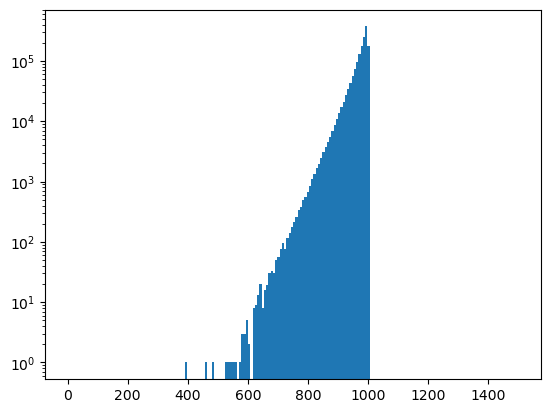

In [121]:
h = plt.hist(np.sqrt(xh**2+yh**2),bins=200,range=(0,1500))
plt.yscale('log')
plt.show()

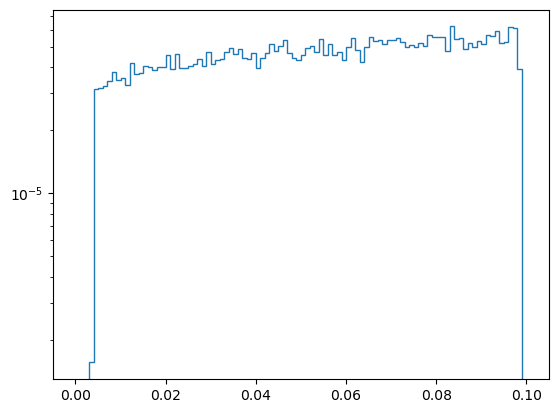

In [117]:
cut = (ev['w']<0)
e = ev['e'][cut]
w = np.exp(ev['w'][cut])

h=plt.hist(e,bins=100,range=(0, 0.1),weights=w, histtype='step')
plt.yscale('log')


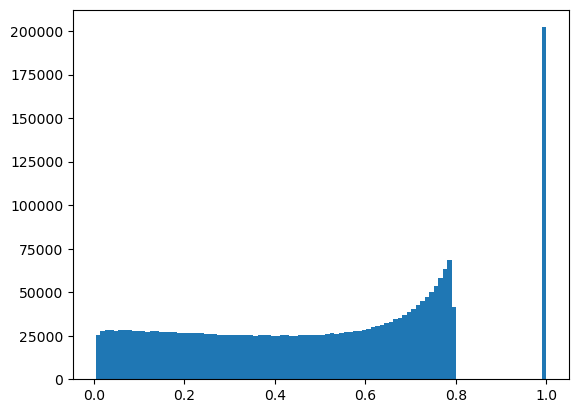

In [112]:
h=plt.hist(e,bins=100)